# Proyek Analisis Data: E-comerce-public-dataset
- **Nama:** Rio Ferdana Sudrajat
- **Email:** riosudrajat77@gmail.com
- **ID Dicoding:** rio_sudrajat

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan seiring berjalannya waktu
- Apakah ada indikasi musiman dalam pola pengeluaran customer?
- produk apa yang paling laris dan produk apa yang paling tidak laris
- Siapa pelanggan yang paling aktif dan paling berharga berdasarkan frekuensi, waktu terakhir pembelian, dan jumlah pembelian?
- dimanakah konsentrasi pelanggan berdaasrkan letak geografisnya?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [21]:
orders = pd.read_csv('data/orders_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
customers = pd.read_csv('data/customers_dataset.csv')
category = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
items = pd.read_csv('data/order_items_dataset.csv')
payments = pd.read_csv('data/order_payments_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

data = {'orders': orders,
        'customers': customers,
        'geo': geolocation,
        'products': products,
        'items': items,
        'payments': payments,
        'category': category,
        'sellers': sellers}

In [22]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [24]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

menilai semua tabel

In [30]:
data_null ={}
for df_name, df in data.items():
  print('\n', df_name)
  print("\ninformasi tabel")
  print('\n', data[df_name].info())
  print("\nmissing value:")
  data_null[df_name] = data[df_name].isnull().sum()
  print('\n',data_null[df_name])
  print("\njumlah duplikat:")
  print('\n', data[df_name].duplicated().sum())
  print("\nstatistik deskriptif:")
  print('\n', data[df_name].describe(include='all'))


 orders

informasi tabel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None

missing value:

 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carri

### Cleaning Data

membersihkan tabel geolocation

duplicate data

In [31]:
data['geo'].drop_duplicates(inplace=True)

In [32]:
print('Jumlah duplikat:', data['geo'].duplicated().sum())

Jumlah duplikat: 0


In [33]:
datetime = ["order_purchase_timestamp",
               "order_approved_at",
               "order_delivered_carrier_date",
               "order_delivered_customer_date",
               "order_estimated_delivery_date"]

for column in datetime:
  data['orders'][column] = pd.to_datetime(data['orders'][column])


In [34]:
data['items']['shipping_limit_date'] = pd.to_datetime(data['items']['shipping_limit_date'])

In [35]:
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [36]:
data['items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [37]:
print('Product cols: ' , data['products'].columns.values)
# saya kira saya tidak membutuhkan kolom yang saya hapus dibawah
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [38]:
data['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_photos_qty     32341 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


## Exploratory Data Analysis (EDA)

### Explore customers


In [39]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
48192,4765067ce1c6bbfe4e97362bc9c7af53,d0dd830df439de8fd6aad408b3e73a76,20940,rio de janeiro,RJ
90972,bf573519a4128a9b186c883fdfa86006,8655a9d6aba16088e25baccc133f3ffb,15190,nhandeara,SP
70745,f064e65677f0641ee4c4d4bfd7b006a3,38ca743e351aa23acb3bc72cc4abdd1e,58200,guarabira,PB
94895,e222c192449d4567112a069cf7d072d9,0e23aff46c3e0058ea2f0f093e8e7eb3,71060,brasilia,DF
56935,8fa1188232c7e51082b4786190ac3e38,f5fc6d10c73d21eb34441b6aac92fc24,37561,pouso alegre,MG


In [40]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [41]:

data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### explore payments



In [42]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
68598,0e3e431534069e8ac235c637dfb199d8,1,boleto,1,176.59
88087,9a58ef14cb28c0d8eb1772e86f0ac133,1,credit_card,1,21.43
47862,6e529c2d797e42723921291678213b8e,1,credit_card,1,62.28
28284,40e1718e2f960a6ef0a449a2d62c8684,1,credit_card,10,167.90
82146,42178905ca532298f19fe27009fff325,1,boleto,1,49.60


In [43]:
data['payments'].groupby(by="payment_type").payment_value.sum().sort_values(ascending=False)

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64

In [44]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### explore orders

In [45]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
84609,4ab7b9945880c46a7fe643c2dacf9ce5,4e9b99cb1af6cfcdb7f1b1eebf15000c,delivered,2017-04-06 19:31:24,2017-04-06 19:45:14,2017-04-07 13:43:00,2017-04-12 13:57:47,2017-05-02
26076,9c2ba52157b36c56751de3ad0e6ec01c,578d5098cbbe40771e1229fea98ccafd,delivered,2018-04-19 10:35:22,2018-04-19 11:15:18,2018-04-19 22:18:31,2018-04-23 19:58:33,2018-05-14
90230,bfcfc352185cef17fc3a748ff2e921d0,be060a38284f028a4b7231b6865b9d7a,delivered,2018-07-29 21:34:43,2018-07-31 06:35:18,2018-08-01 09:32:00,2018-08-07 18:38:43,2018-08-28
42023,a9d7007718934cce4ff47e8f50234160,05c54d191e1209713117327c72caa8ba,delivered,2017-10-04 17:36:02,2017-10-04 17:50:13,2017-10-13 16:59:36,2017-10-27 22:48:24,2017-11-10
51256,8a5fcb4314afcbf3906bd354138b674b,e6b14404e764a575edf95ff97c1ffa90,delivered,2017-10-05 20:31:34,2017-10-06 02:28:31,2017-10-06 20:43:38,2017-10-08 15:33:56,2017-10-23


In [46]:

delivery_time = orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time"] = round(delivery_time/86400)


In [47]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
67148,dd1254ca982d33390f4268c104bcb5b3,c5f44836bcc16b7942d09800e7f23f99,delivered,2018-08-12 13:03:21,2018-08-14 08:50:21,2018-08-15 14:26:00,2018-08-22 13:52:41,2018-09-10,7.0
96696,32c89d9ac47125b85e72ba219a4f09ac,0754629085f41398924535f8b337a630,delivered,2018-06-04 20:03:15,2018-06-04 20:12:01,2018-06-05 14:26:00,2018-06-13 16:32:15,2018-07-11,8.0
60989,34d0b73ffe40c22d8537270e7ffe7517,bdada23b09891540da8555ab278a5fa5,delivered,2017-11-08 19:50:12,2017-11-08 20:30:57,2017-11-10 23:05:50,2017-11-17 16:47:05,2017-12-06,7.0
90844,ec533ae9aa5bd7c370f7da7f9dbd6f64,9c085bb96a09d4c216879ee1d44582d4,delivered,2018-08-10 13:36:16,2018-08-10 13:50:13,2018-08-10 16:24:00,2018-08-13 14:51:50,2018-08-16,3.0
35222,51c7735438088dc983751f683f652995,ea62078ca96a4eef51c43ca0538a57ab,delivered,2018-08-22 21:06:11,2018-08-22 21:24:36,2018-08-23 13:07:00,2018-08-28 20:07:43,2018-09-05,5.0


In [48]:
orders.groupby(by="order_status").order_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

<Axes: >

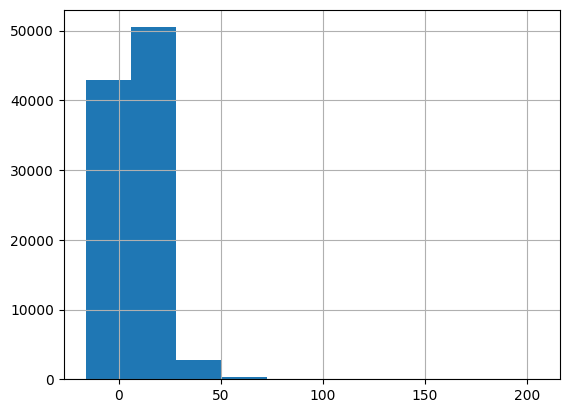

In [49]:
orders.delivery_time.hist()

In [50]:
customers_id_in_orders = orders.customer_id.values
customers['status'] = customers['customer_id'].apply(lambda x: "active" if x in customers_id_in_orders else "Non Active")
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
46132,b68ab347fd38b6934f64787c17ac04cd,5ab603cce283352d94cc28dad9bb9570,14810,araraquara,SP,active
84011,31781f419af2c8f79d4be4a88c6fa600,c40ed267ec92ebb6b0d4661025cf642e,24120,niteroi,RJ,active
93381,77bcab6dd4a3f32f074693436c534da6,76e65678e8bbb313461fb19a6d2c97ee,13219,jundiai,SP,active
82597,90e1d32a97d5acd67dcbe7ad2faa555a,bf1bc30130d30c64e949ca5c5acdfe43,12503,guaratingueta,SP,active
83177,862fff42e0e51660a3d140ee46ca9747,b5a873077a79d73dff6222a35b7a4f79,9850,sao bernardo do campo,SP,active


In [51]:
customers.status.value_counts()

status
active    99441
Name: count, dtype: int64

### eksplor data geolocation

In [52]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
51246,3267,-23.602597,-46.529070,sao paulo,SP
360859,16075,-21.194810,-50.458490,araçatuba,SP
328189,14060,-21.142922,-47.808929,ribeirao preto,SP
837969,79400,-18.503645,-54.737587,coxim,MS
852716,81650,-25.500530,-49.231211,curitiba,PR


In [53]:
geolocation.groupby(by='geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
58403      1
1200       1
1189       1
1290       1
1262       1
Length: 19015, dtype: int64

In [54]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 38400].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
645450,38400,-18.915960,-48.278974,uberlandia,MG
645456,38400,-18.900442,-48.260759,uberlandia,MG
645460,38400,-18.913015,-48.262132,uberlandia,MG
645461,38400,-18.922381,-48.282111,uberlandia,MG
645471,38400,-18.922160,-48.271125,uberlandia,MG


In [55]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [56]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(pretty_string)

In [57]:
missing_zip_customers = set(customers['customer_zip_code_prefix']) - set(geolocation['geolocation_zip_code_prefix'])
print(f"Jumlah zip code pelanggan yang tidak ditemukan di geolocation: {len(missing_zip_customers)}")

Jumlah zip code pelanggan yang tidak ditemukan di geolocation: 157


### merged customer & geolocation

In [58]:
customer_geo = pd.merge(
    customers,
    geolocation,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner')
customer_geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.515413,-47.398194,franca,SP


In [59]:
unique_locations = customer_geo.groupby('customer_id')[['geolocation_lat', 'geolocation_lng']].nunique()
print("Jumlah variasi lokasi per pelanggan:")
print(unique_locations.describe())

Jumlah variasi lokasi per pelanggan:
       geolocation_lat  geolocation_lng
count     99163.000000     99163.000000
mean        101.408852       101.450047
std         100.830806       100.862472
min           1.000000         1.000000
25%          36.000000        36.000000
50%          70.000000        70.000000
75%         131.000000       131.000000
max         746.000000       745.000000


In [60]:
missing_zip_customers = set(customer_geo['customer_zip_code_prefix']) - set(customer_geo['geolocation_zip_code_prefix'])
print(f"Jumlah zip code pelanggan yang tidak ditemukan di geolocation: {len(missing_zip_customers)}")

Jumlah zip code pelanggan yang tidak ditemukan di geolocation: 0


### merged orders & payments

In [61]:
order_payment = pd.merge(
    left = orders,
    right = payments,
    left_on = 'order_id',
    right_on = 'order_id',
    how = 'left')
order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,credit_card,3.0,179.12


In [62]:
order_payment.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [63]:
order_payment.sort_values(by='payment_value', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
13958,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,7.0,1.0,credit_card,1.0,13664.08
69544,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,6.0,1.0,boleto,1.0,7274.88
23138,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,15.0,1.0,credit_card,8.0,6929.31
29628,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,12.0,1.0,boleto,1.0,6922.21
3665,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,10.0,1.0,boleto,1.0,6726.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27113,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaT,2017-05-18,NaN,13.0,voucher,1.0,0.00
89601,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29,9.0,4.0,voucher,1.0,0.00
33797,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22,12.0,4.0,voucher,1.0,0.00
41785,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10,NaN,1.0,not_defined,1.0,0.00


In [64]:
order_payment.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":["min","max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### merged customer_geo & order_payment

In [65]:
customer = pd.merge(
    left = customer_geo,
    right = order_payment,
    left_on = 'customer_id',
    right_on = 'customer_id',
    how = 'left'
)

In [66]:
customer.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15538
rio de janeiro            6882
belo horizonte            2773
brasilia                  1960
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1241
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [67]:
customer.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41731
RJ    12839
MG    11624
RS     5462
PR     5034
SC     3637
BA     3371
ES     2027
GO     2011
DF     1969
Name: order_id, dtype: int64

In [68]:
customer.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [69]:
customer.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96214
shipped         1100
canceled         623
unavailable      607
invoiced         313
processing       300
created            4
approved           2
Name: order_id, dtype: int64

### merge item & selller

In [70]:
item_seller = pd.merge(
    left = items,
    right = sellers,
    left_on = 'seller_id',
    right_on = 'seller_id',
    how = 'left'
)

In [71]:
item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [72]:
item_seller.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

### explore pruduct & category

In [73]:
product_category = pd.merge(
    left = products,
    right = category,
    left_on = 'product_category_name',
    right_on = 'product_category_name',
    how = 'left'
)

In [74]:
product_category.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [75]:
product_category.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

In [76]:
product_category.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

### merged item_seller & product_category

In [77]:
seller = pd.merge(
    left = item_seller,
    right = product_category,
    left_on = 'product_id',
    right_on = 'product_id',
    how = 'left'
)
seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,1.0,garden_tools


In [78]:
seller.sort_values(by='price', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP,utilidades_domesticas,2.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR,pcs,4.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO,artes,2.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP,eletroportateis,2.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP,eletroportateis,2.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP,beleza_saude,3.0,health_beauty
57307,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP,beleza_saude,3.0,health_beauty
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG,construcao_ferramentas_construcao,5.0,construction_tools_construction
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG,construcao_ferramentas_construcao,5.0,construction_tools_construction


In [79]:
seller.groupby(by='product_category_name_english').agg({
    "order_id":"nunique",
    "price":["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### explore main_data

In [80]:
main_data = pd.merge(
    left = customer,
    right = seller,
    left_on = 'order_id',
    right_on = 'order_id',
    how = 'left'
)
main_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.509897,-47.397866,franca,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.497396,-47.399241,franca,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.510459,-47.399553,franca,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.480940,-47.394161,franca,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.515413,-47.398194,franca,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture


In [81]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12374475 entries, 0 to 12374474
Data columns (total 35 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   customer_id                    object        
 1   customer_unique_id             object        
 2   customer_zip_code_prefix       int64         
 3   customer_city                  object        
 4   customer_state                 object        
 5   status                         object        
 6   geolocation_zip_code_prefix    int64         
 7   geolocation_lat                float64       
 8   geolocation_lng                float64       
 9   geolocation_city               object        
 10  geolocation_state              object        
 11  order_id                       object        
 12  order_status                   object        
 13  order_purchase_timestamp       datetime64[ns]
 14  order_approved_at              datetime64[ns]
 15  order_deliver

In [82]:
main_data.groupby(by=['customer_city','product_category_name_english']).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                         
abadia dos dourados books_general_interest           837.90         385.98
                    cool_stuff                      4179.00         433.23
                    sports_leisure                  2520.00         327.39
abadiania           small_appliances               21849.77        1737.19
abaete              baby                            7085.00        1929.30
...                                                     ...            ...
ze doca             food_drink                      2080.00        1216.00
                    garden_tools                    1276.80         851.52
                    musical_instruments            11488.00        1569.28
                    sports_leisure                  4796.80        1235.20
zortea              computers_accessories            768.90         230.78

[25131 rows x 2 columns]

In [83]:
main_data.groupby(by=['customer_state','product_category_name_english']).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                          
AC             auto                            58667.26       12793.08
               baby                            32844.96        4829.90
               bed_bath_table                   5849.30        1611.74
               books_general_interest          74117.60       12045.18
               christmas_supplies               6081.30        5302.65
...                                                 ...            ...
TO             sports_leisure                 272839.87       59174.25
               stationery                       8800.30        2068.54
               telephony                       82356.59       26944.49
               toys                            57297.96       18589.17
               watches_gifts                  298023.67       61184.03

[1355 rows x 2 columns]

In [84]:
main_data.groupby(by='customer_state').agg({
    "order_id":"nunique",
    "payment_value":"sum"
}).sort_values(by='payment_value', ascending=False)

,order_id,payment_value
customer_state,,
SP,41731,7.219672e+08
MG,11624,4.639420e+08
RJ,12839,3.539644e+08
RS,5462,1.269664e+08
PR,5034,9.812208e+07
SC,3637,8.946267e+07
BA,3371,6.851714e+07
ES,2027,4.192767e+07
MT,905,2.965035e+07


In [85]:
# main_data.to_csv('main_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan seiring berjalannya waktu


In [86]:
monthly = main_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly.index = monthly.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly = monthly.reset_index()
monthly.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\2109119550.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = main_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [87]:
monthly = monthly.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [88]:
monthly.head()

,order_approved_at,order_count
12,September,4288
13,October,4576
15,December,5816
21,June,6148
22,July,6160


In [89]:
monthly.sort_values(by='order_count')

,order_approved_at,order_count
12,September,4288
13,October,4576
15,December,5816
21,June,6148
22,July,6160
23,August,6598
17,February,6684
19,April,6758
20,May,7047
16,January,7173


In [90]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly["month_numeric"] = monthly["order_approved_at"].map(month_mapping)
monthly = monthly.sort_values("month_numeric")
monthly = monthly.drop("month_numeric", axis=1)

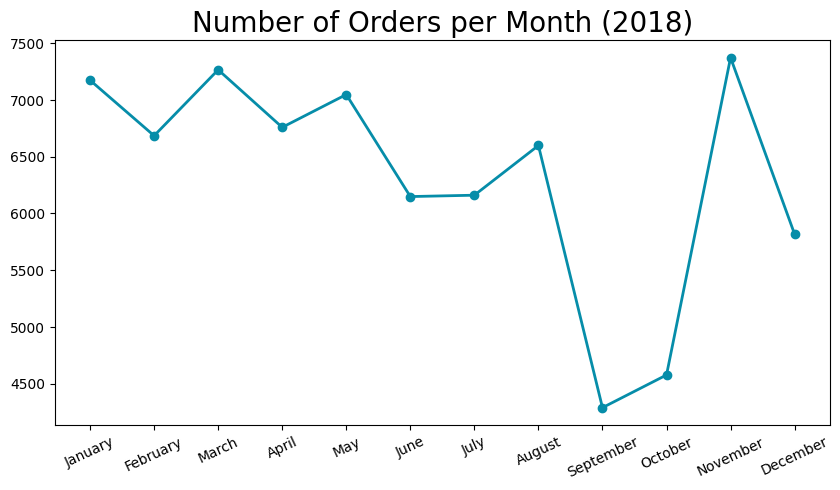

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly["order_approved_at"],
    monthly["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Terlihat pada grafik diatas bahwa terjadi penurunan penjualan signifikan pada bulan September dan mengalami kenaikan yang signifikan pada bulan November.

### 2. Apakah ada indikasi musiman dalam pola pengeluaran customer?


In [92]:
monthly_spend = main_data.resample(rule='M', on='order_approved_at').agg({
    "payment_value":"sum"
})
monthly_spend.index = monthly_spend.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_spend = monthly_spend.reset_index()
monthly_spend.rename(columns={
    "payment_value":"total_spend"
}, inplace=True)
monthly_spend.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\1111243331.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_spend = main_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_spend
0,September,0.00
1,October,8550910.97
2,November,0.00
3,December,2923.38
4,January,18199726.76


In [93]:
monthly_spend = monthly_spend.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

In [94]:
monthly_spend.head()

,order_approved_at,total_spend
12,September,9.432990e+07
13,October,1.085895e+08
15,December,1.222049e+08
23,August,1.287866e+08
17,February,1.335000e+08


In [95]:
monthly_spend.sort_values(by='total_spend')

,order_approved_at,total_spend
12,September,9.432990e+07
13,October,1.085895e+08
15,December,1.222049e+08
23,August,1.287866e+08
17,February,1.335000e+08
22,July,1.337263e+08
21,June,1.379787e+08
16,January,1.504676e+08
18,March,1.529087e+08
19,April,1.550364e+08


In [96]:
monthly_spend["month_numeric"] = monthly_spend["order_approved_at"].map(month_mapping)
monthly_spend = monthly_spend.sort_values("month_numeric")
monthly_spend = monthly_spend.drop("month_numeric", axis=1)

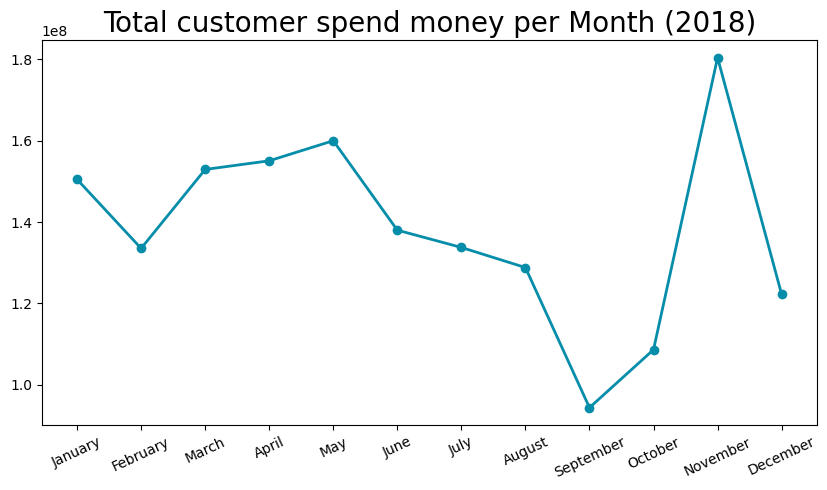

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_spend["order_approved_at"],
    monthly_spend["total_spend"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Total customer spend money per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Pada grafik diatas, total uang yang dihabiskan paling banyak pada bulan November dan paling sedikit pada bulan September.

### pertanyaan 3: produk apa yang paling laris dan produk apa yang paling tidak laris


In [98]:
sum_order_items = main_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items = sum_order_items.rename(columns={"product_id": "products"})
sum_order_items = sum_order_items.sort_values(by="products", ascending=False)
sum_order_items = sum_order_items.head(10)

sum_order_items.head()

,product_category_name_english,products
7,bed_bath_table,1281472
43,health_beauty,990613
39,furniture_decor,950289
65,sports_leisure,941685
15,computers_accessories,854275


C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\1116653299.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.head(5), palette=colors, ax=ax[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\1116653299.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])


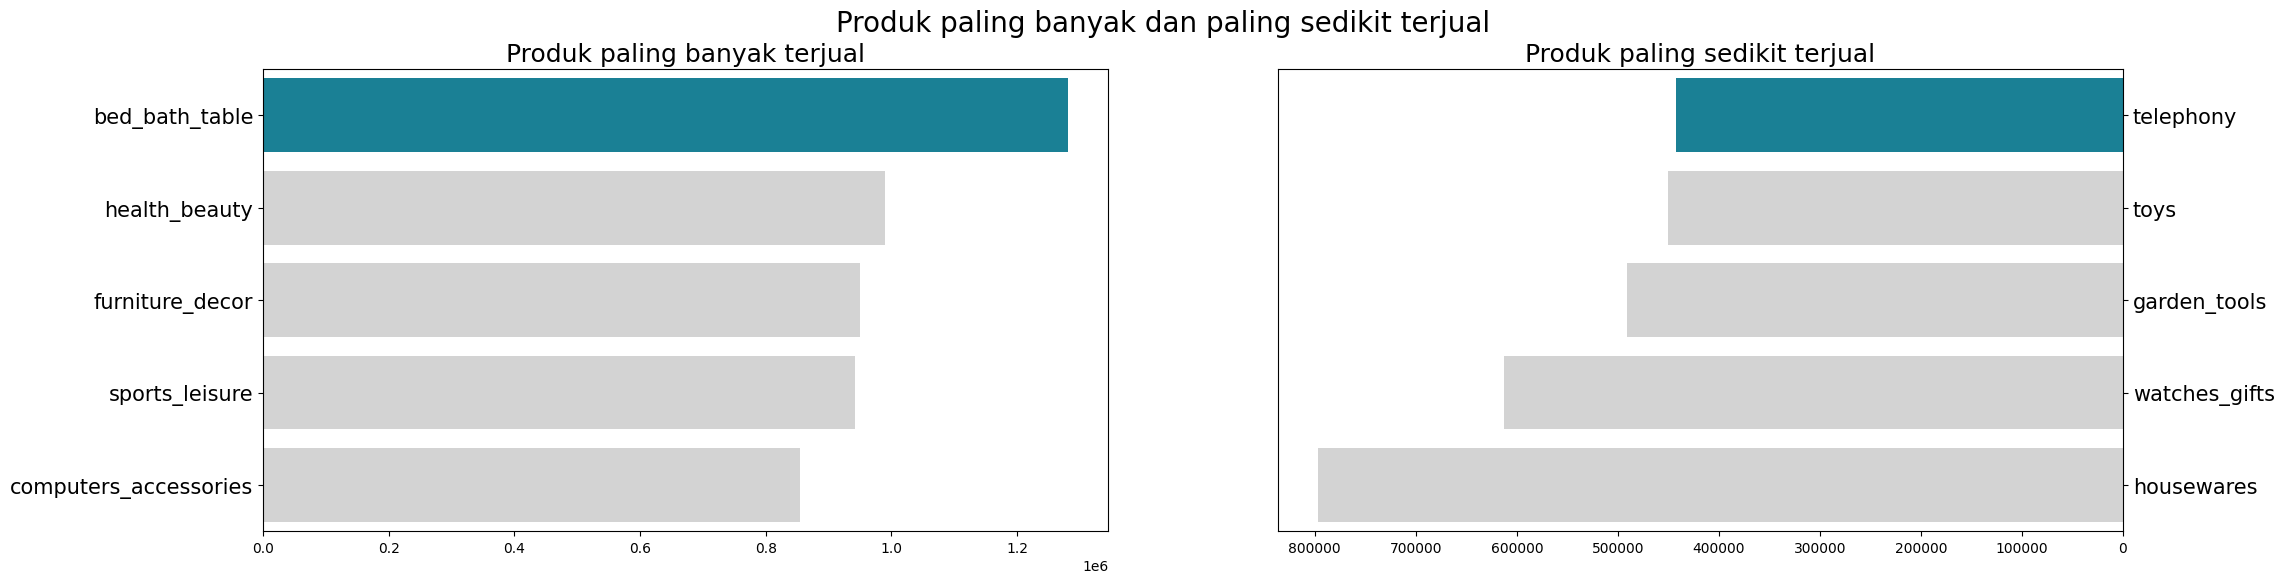

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

Terlihat pada grafik diatas, Produk yang paling banyak terjual adalah bed_bath_table. dan produk yang paling sedikit terjual adalah telephony.

### pertanyaan 4: Siapa pelanggan yang paling aktif dan paling berharga berdasarkan frekuensi, waktu terakhir pembelian, dan jumlah pembelian?

In [100]:
rfm = main_data.groupby('customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'count',
    'payment_value': 'sum'
})
rfm.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm["max_order_timestamp"] = rfm["max_order_timestamp"].dt.date
recent_date = orders["order_purchase_timestamp"].dt.date.max()
rfm["recency"] = rfm["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm.drop("max_order_timestamp", axis=1, inplace=True)
rfm.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,75,8605.50,337
1,000161a058600d5901f007fab4c27140,87,5864.67,458
2,0001fd6190edaaf884bcaf3d49edf079,173,33807.66,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,72,7704.72,198


C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\2069524600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="short_customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\2069524600.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="short_customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9152\2069524600.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

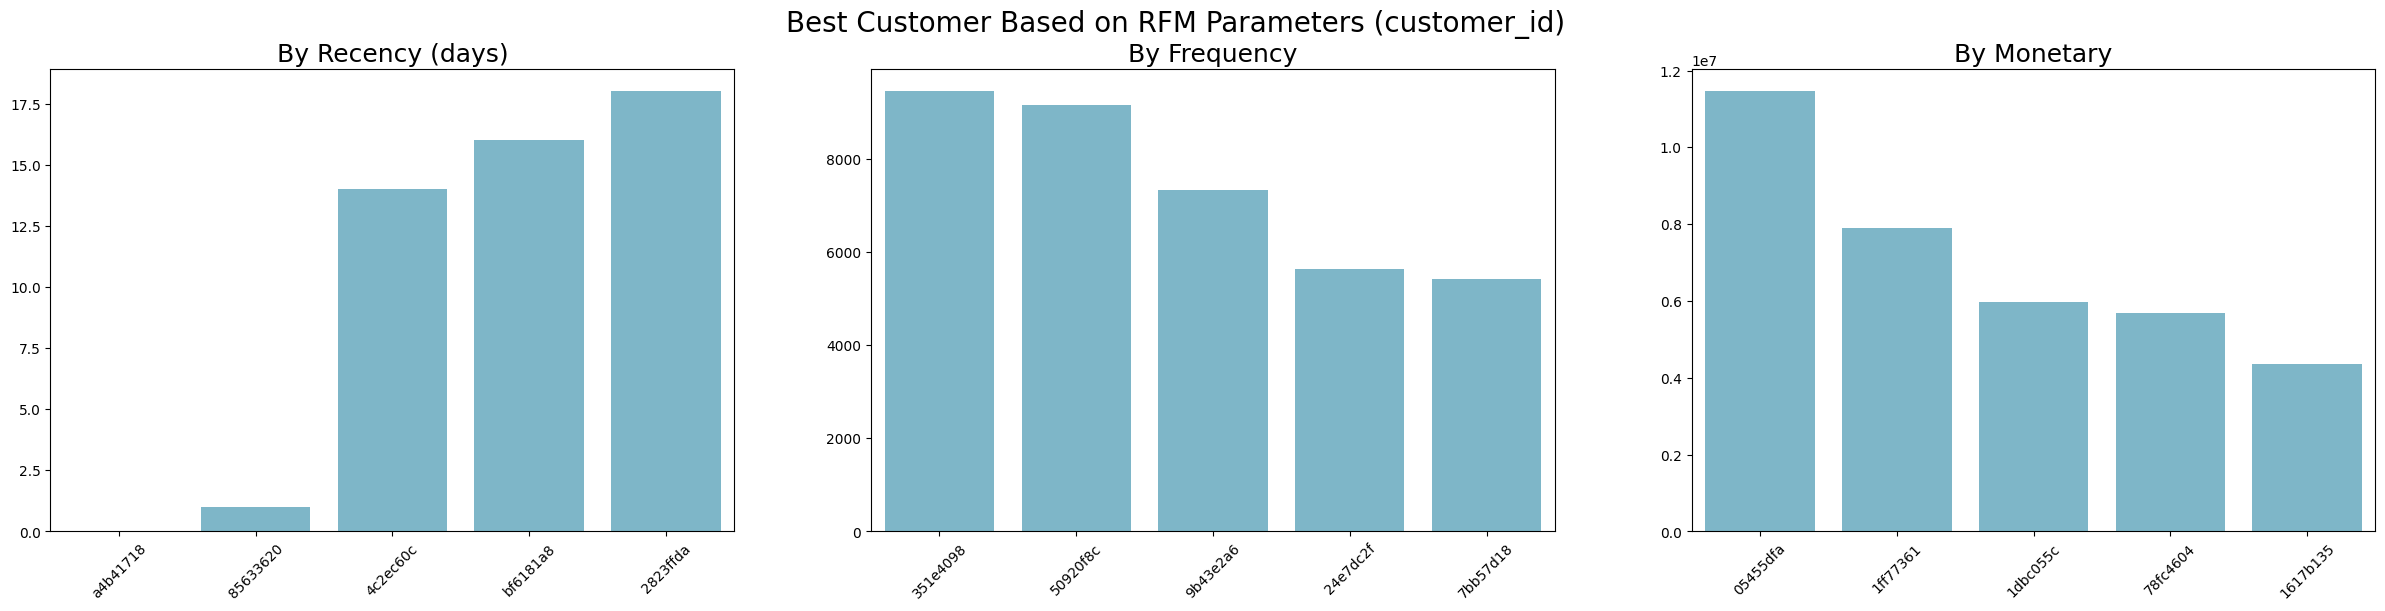

In [101]:
rfm['short_customer_id'] = rfm['customer_id'].str[:8]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="short_customer_id", data=rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelrotation=45)  # Putar label

sns.barplot(y="frequency", x="short_customer_id", data=rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=45)  # Putar label

sns.barplot(y="monetary", x="short_customer_id", data=rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelrotation=45)  # Putar label

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Customer ID "2828ffb4" memiliki nilai recency tertinggi sekitar 17.5 hari,Customer ID "251403f8" memiliki frekuensi pembelian tertinggi sekitar 9000 kali,Customer ID "055c85d8" memiliki nilai moneter tertinggi sekitar 1.1 × 10^7

### pertanyaan 5 dimanakah konsentrasi pelanggan berdaasrkan letak geografisnya?

In [102]:
other_state_geolocation = main_data.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = main_data.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)


In [103]:
geolocation_silver = main_data.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [104]:
customers_silver = main_data.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [105]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,geolocation_city_x,...,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english,geolocation_zip_code_prefix_y,geolocation_city_y,geolocation_state_y,geolocation_lat_y,geolocation_lng_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.509897,-47.397866,franca,...,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture,14409,franca,SP,-20.502307,-47.39674
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.497396,-47.399241,franca,...,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture,14409,franca,SP,-20.502307,-47.39674
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.510459,-47.399553,franca,...,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture,14409,franca,SP,-20.502307,-47.39674
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.480940,-47.394161,franca,...,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture,14409,franca,SP,-20.502307,-47.39674
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,active,14409,-20.515413,-47.398194,franca,...,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture,14409,franca,SP,-20.502307,-47.39674


In [106]:
customers_silver.to_csv("geolocation.csv", index=False)

In [107]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng_y", y="geolocation_lat_y", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

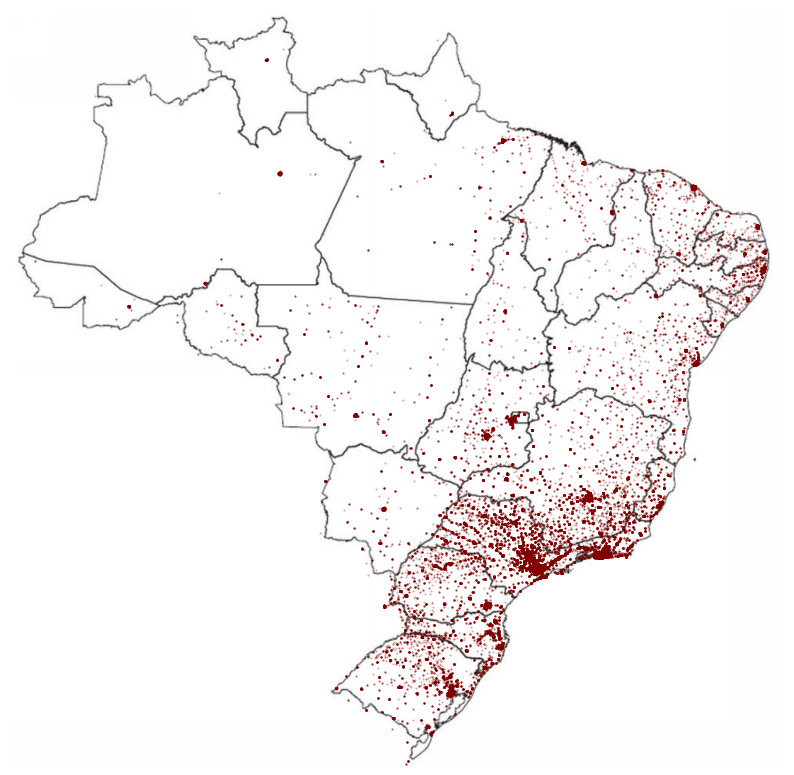

In [108]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Banyak customer yang berasal dari negara bagian tenggara dan selatan.

## Conclusion

- Bagaimana performa penjualan seiring berjalannya waktu?
> Performa penjualan selama tahun 2018 menunjukkan fluktuasi yang signifikan dengan beberapa pola penting:

Awal tahun (Januari-Mei) menunjukkan performa yang relatif stabil dan kuat, dengan jumlah order berkisar antara 6,500-7,300 per bulan. Puncak tertinggi di periode ini terjadi pada bulan Maret dengan sekitar 7,300 order. Terjadi penurunan bertahap mulai Juni-Juli, di mana jumlah order turun ke level sekitar 6,000 order per bulan.Penurunan drastis terjadi pada September, mencapai titik terendah dengan hanya sekitar 4,300 order. Terjadi pemulihan yang sangat signifikan pada Oktober-November, dengan November mencapai puncak tertinggi sepanjang tahun di angka sekitar 7,400 order. Akhir tahun (Desember) kembali mengalami penurunan tajam ke level sekitar 5,800 order.

Kesimpulan:

Bisnis menunjukkan pola musiman yang jelas dengan performa terkuat di awal tahun dan menjelang akhir tahun (November).
Periode September merupakan titik terlemah yang perlu mendapat perhatian khusus untuk perbaikan di masa mendatang.
Fluktuasi yang tajam antara bulan-bulan tertentu (terutama September-November) menunjukkan adanya faktor eksternal yang kuat yang mempengaruhi performa penjualan.
Perlu strategi khusus untuk menjaga stabilitas penjualan, terutama di periode-periode yang secara historis menunjukkan penurunan signifikan.

- Apakah ada indikasi musiman dalam pola pengeluaran customer?

> Pada awal tahun, mulai dari bulan Januari hingga Mei, pengeluaran pelanggan menunjukkan tren yang stabil dengan kenaikan bertahap. Angka awal sekitar 1.5 × 10⁸ mencerminkan musim belanja yang kuat, yang kemudian terus tumbuh hingga mencapai puncaknya di bulan Mei dengan total pengeluaran sekitar 1.6 × 10⁸. Stabilitas ini menggambarkan perilaku belanja pelanggan yang konsisten, kemungkinan didukung oleh kebutuhan pasca-liburan yang masih tinggi. Periode ini memberikan peluang bagi bisnis untuk mempertahankan momentum dengan strategi yang minimal tetapi efektif, mengingat kestabilannya.

> Memasuki pertengahan tahun, dari bulan Juni hingga September, pengeluaran pelanggan mengalami penurunan secara bertahap. Dimulai dari angka yang cukup tinggi di bulan Juni, tren ini berlanjut hingga mencapai titik terendahnya pada bulan September, yaitu sekitar 0.95 × 10⁸. Penurunan ini mengindikasikan adanya low season dalam aktivitas belanja, yang seringkali terjadi akibat perubahan kebutuhan atau prioritas pelanggan pada periode ini. Fenomena ini memberikan tantangan bagi bisnis untuk menjaga tingkat penjualan tetap stabil melalui inovasi dan strategi promosi yang lebih agresif.

> Pada akhir tahun, antara bulan Oktober hingga Desember, pola pengeluaran berubah secara signifikan. Terjadi lonjakan drastis menuju bulan November, di mana pengeluaran mencapai puncaknya pada angka 1.8 × 10⁸. November menjadi puncak musim belanja, yang kemungkinan dipengaruhi oleh berbagai kampanye belanja besar-besaran seperti diskon akhir tahun atau promosi khusus. Namun, setelah puncak tersebut, terjadi penurunan tajam di bulan Desember, mencerminkan pengeluaran pelanggan yang mulai berkurang setelah periode belanja intensif sebelumnya. Meski demikian, periode ini tetap menjadi perhatian penting karena akhir tahun sering kali diwarnai oleh kebutuhan belanja spesifik yang masih bisa dimaksimalkan oleh bisnis.

> Secara keseluruhan, terdapat pola musiman yang sangat jelas dalam pengeluaran pelanggan. Awal tahun menunjukkan kestabilan yang baik, pertengahan tahun menjadi periode low season yang perlu diantisipasi, sementara akhir tahun menunjukkan adanya peak season yang berpusat di bulan November. Pemahaman terhadap pola ini dapat menjadi dasar untuk merencanakan strategi bisnis yang lebih efektif, seperti menyiapkan kapasitas ekstra menjelang November, menyusun promosi khusus di bulan September, dan mengoptimalkan momentum stabil pada awal tahun. Dengan penyesuaian strategi yang tepat, bisnis dapat memanfaatkan peluang yang ada serta menghadapi tantangan musiman dengan lebih percaya diri.

- produk apa yang paling laris dan produk apa yang paling tidak laris?
> Berdasarkan grafik produk paling banyak dan paling sedikit terjual, terlihat jelas adanya perbedaan signifikan dalam performa penjualan antar kategori produk.

> Kategori bed_bath_table mendominasi penjualan dengan angka tertinggi mencapai 1.2 juta unit. Hal ini menunjukkan bahwa produk-produk perlengkapan kamar tidur dan kamar mandi sangat diminati oleh konsumen. Di posisi kedua, kategori health_beauty mencapai penjualan sekitar 900 ribu unit, mengindikasikan tingginya kesadaran konsumen akan produk kesehatan dan kecantikan. Kategori furniture_decor dan sports_leisure juga menunjukkan performa yang baik dengan penjualan masing-masing sekitar 850 ribu dan 800 ribu unit. Computers_accessories melengkapi lima besar produk terlaris dengan penjualan sekitar 700 ribu unit.

> Di sisi lain, kategori telephony mencatat penjualan terendah dengan angka di bawah 100 ribu unit. Kategori toys dan garden_tools juga menunjukkan performa yang kurang optimal dengan penjualan masing-masing sekitar 150 ribu dan 200 ribu unit. Kategori watches_gifts dan housewares turut melengkapi daftar produk dengan penjualan terendah, masing-masing mencapai sekitar 300 ribu dan 400 ribu unit.

> Kesimpulannya, terdapat kesenjangan yang cukup besar antara produk terlaris dan produk yang kurang diminati. Produk-produk yang berkaitan dengan kebutuhan rumah tangga dan kesehatan mendominasi penjualan, sementara produk-produk elektronik seperti telephony dan kategori spesifik seperti mainan dan alat kebun kurang mendapat respons positif dari konsumen. Data ini dapat menjadi dasar untuk evaluasi strategi pemasaran, manajemen inventori, dan pengembangan kategori produk di masa mendatang. Perlu adanya perhatian khusus untuk meningkatkan performa penjualan kategori produk yang kurang diminati, misalnya melalui strategi promosi yang lebih agresif atau evaluasi ulang positioning produk di pasar.

- Siapa pelanggan yang paling aktif dan paling berharga berdasarkan frekuensi, waktu terakhir pembelian, dan jumlah pembelian?
>Berdasarkan data yang ditampilkan dalam tiga grafik tersebut, terlihat pola perilaku pelanggan yang menarik dari segi waktu pembelian terakhir (recency), frekuensi pembelian, dan nilai moneter transaksi. Mari kita telaah lebih mendalam setiap aspeknya.
Pertama, dari segi waktu pembelian terakhir (recency), pelanggan dengan ID "2828ffb4" menunjukkan aktivitas pembelian paling baru dengan rentang waktu sekitar 17.5 hari. Hal ini mengindikasikan bahwa pelanggan tersebut memiliki engagement yang sangat baik dengan perusahaan dan masih aktif melakukan transaksi hingga saat ini. Tingkat kebaruan transaksi yang tinggi ini bisa menjadi indikator positif untuk potensi pembelian berkelanjutan di masa mendatang.

> Dari perspektif frekuensi pembelian, pelanggan dengan ID "251403f8" mencatatkan rekor tertinggi dengan hampir 9000 kali transaksi. Diikuti sangat ketat oleh pelanggan "550f48c6" dengan sekitar 8500 transaksi. Tingginya frekuensi pembelian ini menunjukkan loyalitas pelanggan yang luar biasa dan ketergantungan yang kuat terhadap produk atau layanan perusahaan. Pola pembelian berulang ini sangat berharga bagi stabilitas pendapatan perusahaan.

> Sementara itu, dari sisi nilai moneter, pelanggan "055c85d8" memimpin dengan total nilai transaksi mencapai 1.1 × 10^7. Angka ini sangat signifikan bila dibandingkan dengan pelanggan lainnya yang nilai transaksinya berada di bawah 8 × 10^6. Besarnya nilai transaksi ini mengindikasikan bahwa pelanggan tersebut memiliki daya beli tinggi dan mungkin merupakan pelanggan korporat atau pelanggan premium yang menggunakan produk atau layanan dalam skala besar.

> Menariknya, terdapat pola yang berbeda antara frekuensi dan nilai moneter. Pelanggan dengan frekuensi pembelian tertinggi tidak selalu menjadi penyumbang nilai transaksi terbesar. Ini menunjukkan adanya segmentasi alami dalam basis pelanggan, di mana sebagian pelanggan lebih sering melakukan transaksi dengan nilai lebih kecil, sementara yang lain melakukan transaksi lebih jarang namun dengan nilai yang lebih besar.

> Berdasarkan analisis komprehensif ini, dapat disimpulkan bahwa setiap pelanggan memiliki pola dan karakteristik unik yang membutuhkan pendekatan berbeda. Pelanggan dengan frekuensi tinggi seperti "251403f8" membutuhkan program loyalitas yang kuat untuk mempertahankan pola pembelian mereka. Sementara pelanggan dengan nilai transaksi besar seperti "055c85d8" mungkin memerlukan layanan premium dan personal untuk memastikan kepuasan mereka. Adapun pelanggan dengan recency tinggi seperti "2828ffb4" perlu dijaga engagementnya melalui program-program retensi yang tepat sasaran.

- dimanakah konsentrasi pelanggan berdaasrkan letak geografisnya?
> Peta sebaran pelanggan menampilkan distribusi geografis yang sangat menarik di seluruh wilayah Brazil. Terlihat dengan jelas bahwa konsentrasi pelanggan didominasi di wilayah tenggara dan sepanjang pesisir timur negara. Wilayah tenggara, khususnya di sekitar kota-kota besar seperti São Paulo dan Rio de Janeiro, menunjukkan kepadatan titik merah yang sangat tinggi, mengindikasikan besarnya jumlah pelanggan di area tersebut.


>Sepanjang pesisir timur Brazil juga menampilkan pola sebaran pelanggan yang cukup padat, membentang dari wilayah timur laut hingga selatan negara. Hal ini menunjukkan bahwa aktivitas e-commerce sangat aktif di wilayah-wilayah urban yang memiliki akses internet dan infrastruktur yang baik. Beberapa kota metropolitan di bagian selatan negara juga menunjukkan konsentrasi pelanggan yang cukup signifikan.


>Di sisi lain, wilayah Amazon di bagian utara dan area pedalaman di bagian tengah Brazil menunjukkan sebaran titik yang sangat jarang. Begitu pula dengan wilayah barat Brazil yang memperlihatkan minimnya aktivitas e-commerce. Pola ini mencerminkan kesenjangan digital dan infrastruktur antara wilayah urban dan rural di Brazil.


>Kesimpulan dari peta sebaran ini menunjukkan bahwa aktivitas e-commerce di Brazil sangat terpusat di wilayah-wilayah yang memiliki tingkat urbanisasi tinggi dan infrastruktur yang memadai. Hal ini juga mengindikasikan adanya potensi pengembangan pasar yang besar di wilayah-wilayah yang masih memiliki penetrasi e-commerce rendah, terutama jika didukung dengan peningkatan infrastruktur dan aksesibilitas digital di masa mendatang.